Cleaning and Visualizing Census Data

In [50]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

#importing census data
us_census= pd.read_csv('state_census_info.csv')

print(us_census.head())
print(us_census.columns)
print(us_census.dtypes)

   index       State  TotalPop             Hispanic                White  \
0      0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2      2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3      3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4      4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_24895

In [51]:
#remove $ sign from income

us_census['Income'] = us_census['Income'].replace(r"[^\d.]", "", regex=True)

print(us_census['Income'].head())

0    43296.35860306644
1    70354.74390243902
2    54207.82095490716
3    41935.63396778917
4    67264.78230266465
Name: Income, dtype: object


In [52]:
#split GenderPop into two separate columns and convert to numeric (men)
us_census['Men'] = us_census['GenderPop'].str.split('_').str[0]
us_census['Men'] = us_census['Men'].str.slice(0,-1)
us_census['Men'] = pd.to_numeric(us_census['Men'])

print(us_census['Men'].head())


0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Men, dtype: int64


In [53]:
#split GenderPop into two separate columns and convert to numeric (women)
us_census['Women'] = us_census['GenderPop'].str.split('_').str[1]
us_census['Women'] = us_census['Women'].str.slice(0,-1)
us_census['Women'] = pd.to_numeric(us_census['Women'])

print(us_census['Women'].head())

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
Name: Women, dtype: float64


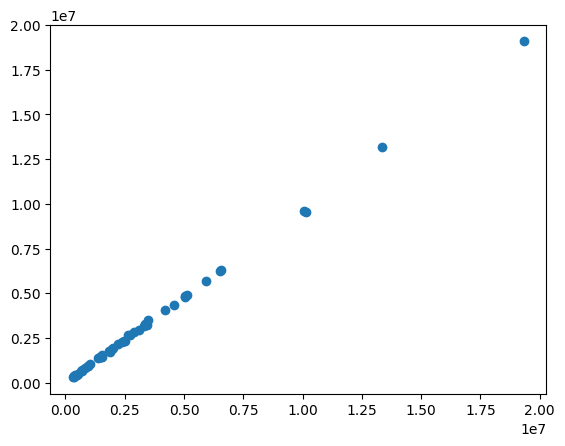

In [54]:
#scatterplot

plt.scatter(us_census['Women'], us_census['Men'])
plt.show()

In [55]:
#fill in nan values for women column using totalpop-men columns
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop']- us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
print(us_census['Women'].head())

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
Name: Women, dtype: float64


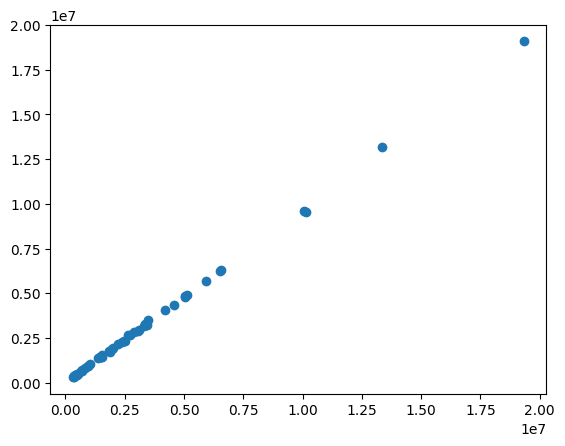

In [56]:
#print scatterplot again after dupes dropped
plt.scatter(us_census['Women'], us_census['Men'])
plt.show()

In [57]:
#check columns to see updated table
print(us_census.columns)

Index(['index', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


0     3.751616
1     5.909581
2    29.565921
3     6.215474
4    37.291875
Name: Hispanic, dtype: float64


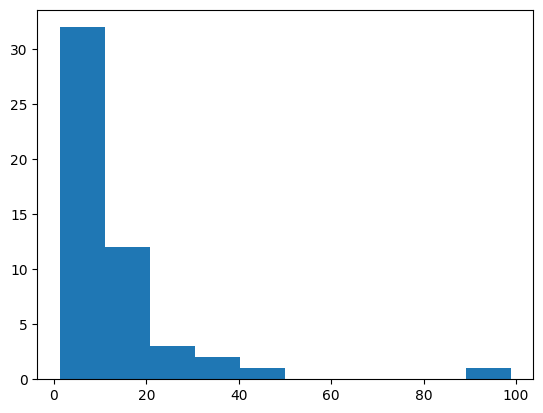

In [58]:
#remove % signs from race columns and convert to numeric
us_census['Hispanic'] = us_census['Hispanic'].str.slice(0,-1)
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])
us_census['Hispanic'] = us_census['Hispanic'].fillna(us_census['Hispanic'].mean())
print(us_census['Hispanic'].head())

#histogram

plt.hist(us_census['Hispanic'])
plt.show()

0    61.878656
1    60.910180
2    57.120000
3    71.137810
4    40.215789
Name: White, dtype: float64


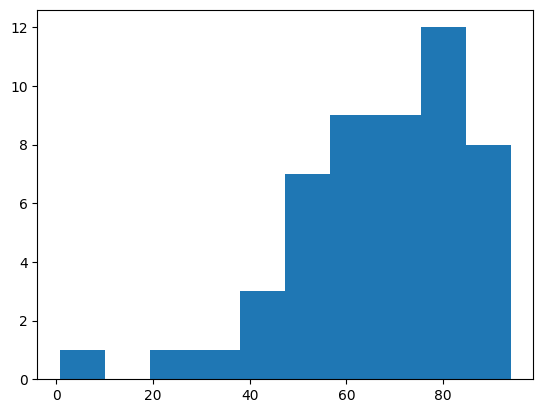

In [59]:
us_census['White'] = us_census['White'].str.slice(0,-1)
us_census['White'] = pd.to_numeric(us_census['White'])
us_census['White'] = us_census['White'].fillna(us_census['White'].mean())
print(us_census['White'].head())

#histogram
plt.hist(us_census['White'])
plt.show()

0    31.252976
1     2.848503
2     3.850987
3    18.968759
4     5.677396
Name: Black, dtype: float64


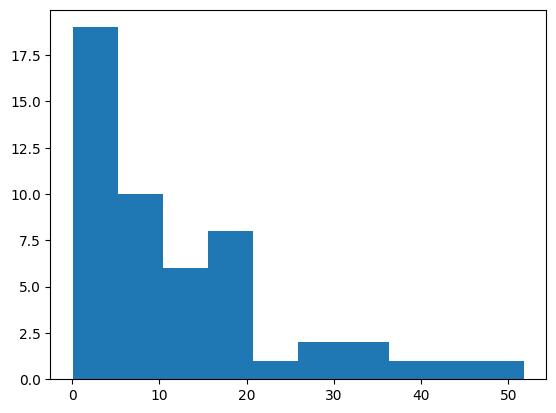

In [60]:
us_census['Black'] = us_census['Black'].str.slice(0,-1)
us_census['Black'] = pd.to_numeric(us_census['Black'])
us_census['Black'] = us_census['Black'].fillna(us_census['Black'].mean())
print(us_census['Black'].head())

#histogram
plt.hist(us_census['Black'])
plt.show()

0     0.453231
1    16.391018
2     4.355066
3     0.522920
4     0.405292
Name: Native, dtype: float64


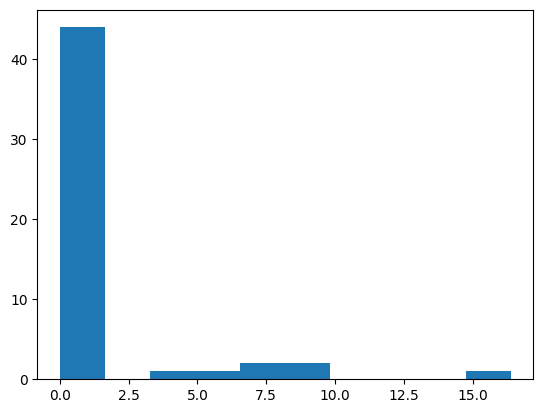

In [61]:
us_census['Native'] = us_census['Native'].str.slice(0,-1)
us_census['Native'] = pd.to_numeric(us_census['Native'])
us_census['Native'] = us_census['Native'].fillna(us_census['Native'].mean())
print(us_census['Native'].head())

#histogram
plt.hist(us_census['Native'])
plt.show()

0     1.050255
1     5.450299
2     2.876579
3     1.142336
4    13.052234
Name: Asian, dtype: float64


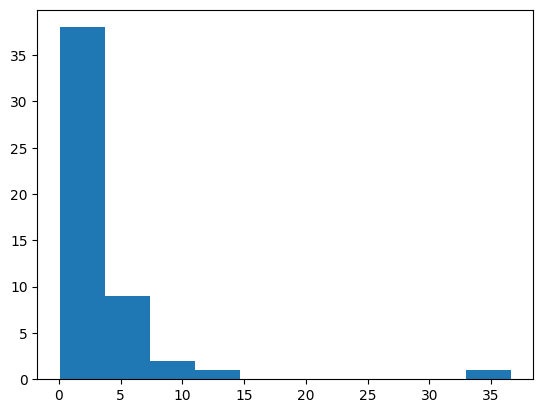

In [62]:
us_census['Asian'] = us_census['Asian'].str.slice(0,-1)
us_census['Asian'] = pd.to_numeric(us_census['Asian'])
us_census['Asian'] = us_census['Asian'].fillna(us_census['Asian'].mean())
print(us_census['Asian'].head())

#histogram
plt.hist(us_census['Asian'])
plt.show()

0    0.034354
1    1.058683
2    0.167632
3    0.146861
4    0.351410
Name: Pacific, dtype: float64


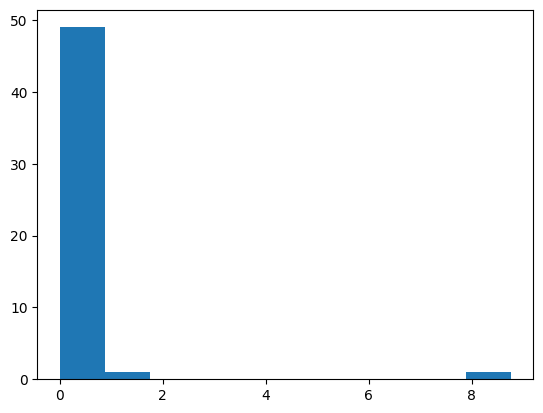

In [63]:
us_census['Pacific'] = us_census['Pacific'].str.slice(0,-1)
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])
us_census['Pacific'] = us_census['Pacific'].fillna(us_census['Pacific'].mean())
print(us_census['Pacific'].head())

#histogram
plt.hist(us_census['Pacific'])
plt.show()

In [ ]:
#can us for loop to clean up race data

for col in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    us_census[col] = us_census[col].str.slice(0, -1)
    us_census[col] = pd.to_numeric(us_census[col])
    us_census[col] = us_census[col].fillna(us_census[col].mean())